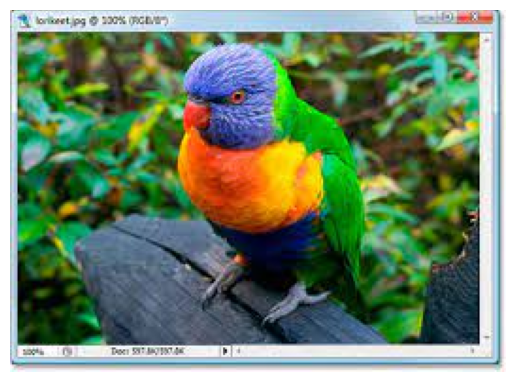

Image saved as output_image.jpg
Pixel values saved as RGB_pixels.txt


In [24]:
import os  # Import os to check for file existence
from PIL import Image
import matplotlib.pyplot as plt

# Function to read and save an RGB image and its pixel values
def read_and_save_rgb_image(input_file, output_text_file):
    # Read the image
    img = Image.open(input_file)  # Open as RGB

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Save the RGB image to a new file (optional)
    output_image_file = 'output_image.jpg'  # Specify the output image file name
    img.save(output_image_file)
    print(f"Image saved as {output_image_file}")

    # Check if the pixel file exists and clear it if it does
    if os.path.exists(output_text_file):
        open(output_text_file, 'w').close()  # Clear the file

    # Get the pixel values
    pixel_values = list(img.getdata())

    # Write pixel values to the text file
    with open(output_text_file, 'a') as f:  # Append to the file
        for pixel in pixel_values:
            f.write(f"{pixel[0]}, {pixel[1]}, {pixel[2]}\n")  # Write RGB values
    print(f"Pixel values saved as {output_text_file}")

# Specify the input and output file paths
input_file = 'bird.jpeg'  # Change this to your input image path
output_text_file = 'RGB_pixels.txt'  # Change this to your desired output text file path

# Call the function
read_and_save_rgb_image(input_file, output_text_file)


Grayscale image saved as bird_grayscale.jpg


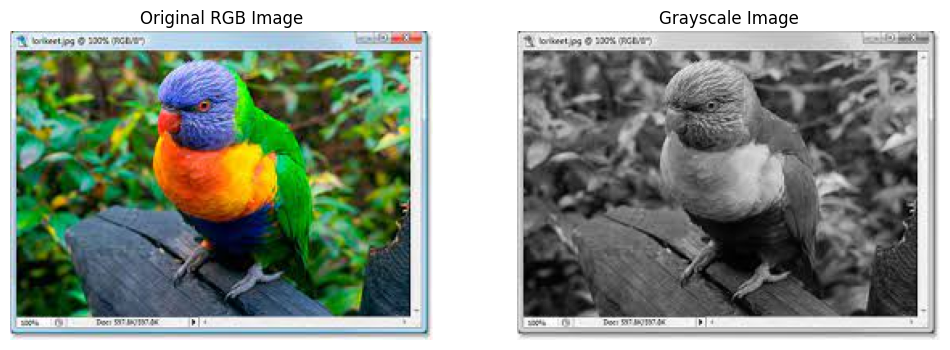

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert an RGB image to grayscale
def convert_rgb_to_grayscale(input_file, output_file):
    # Read the RGB image
    img = Image.open(input_file)

    # Convert the image to grayscale
    grayscale_img = img.convert('L')

    # Save the grayscale image
    grayscale_img.save(output_file)
    print(f"Grayscale image saved as {output_file}")

    # Display the original and grayscale images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original RGB Image')

    # Grayscale Image
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_img, cmap='gray')
    plt.axis('off')
    plt.title('Grayscale Image')

    plt.show()

# Specify the input and output file paths
input_file = 'bird.jpeg'  # Change this to your input image path
output_file = 'bird_grayscale.jpg'  # Change this to your desired output image path

# Call the function
convert_rgb_to_grayscale(input_file, output_file)


# here i read the grayscale image  and write it pixels on a text file

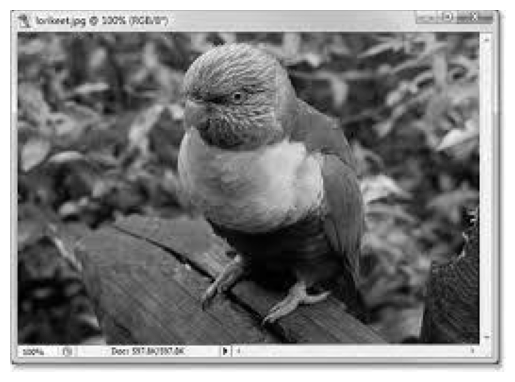

Pixel intensity values saved as grayscale_pixels.txt


In [36]:
import os  # Import os to check for file existence
from PIL import Image
import matplotlib.pyplot as plt

# Function to read a grayscale image and save its pixel intensity values row by row
def read_gray_image_and_save_intensities(input_file, output_text_file):
    # Read the grayscale image
    img = Image.open(input_file).convert('L')  # Ensure it's in grayscale

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

    # Check if the pixel file exists and clear it if it does
    if os.path.exists(output_text_file):
        open(output_text_file, 'w').close()  # Clear the file

    # Get the pixel values and convert to a 2D list (rows)
    width, height = img.size
    pixel_values = list(img.getdata())
    pixel_matrix = [pixel_values[i * width:(i + 1) * width] for i in range(height)]

    # Write pixel intensity values to the text file row by row
    with open(output_text_file, 'a') as f:
        for row in pixel_matrix:
            f.write(', '.join(map(str, row)) + '\n')  # Write intensity values of each row

    print(f"Pixel intensity values saved as {output_text_file}")

# Specify the input and output file paths
input_file = 'bird_grayscale.jpg'  # Change this to your input grayscale image path
output_text_file = 'grayscale_pixels.txt'  # Desired output text file path

# Call the function
read_gray_image_and_save_intensities(input_file, output_text_file)


# Here, we manipulate the grayscale pixels by adding,subtracting and multiplying a constant


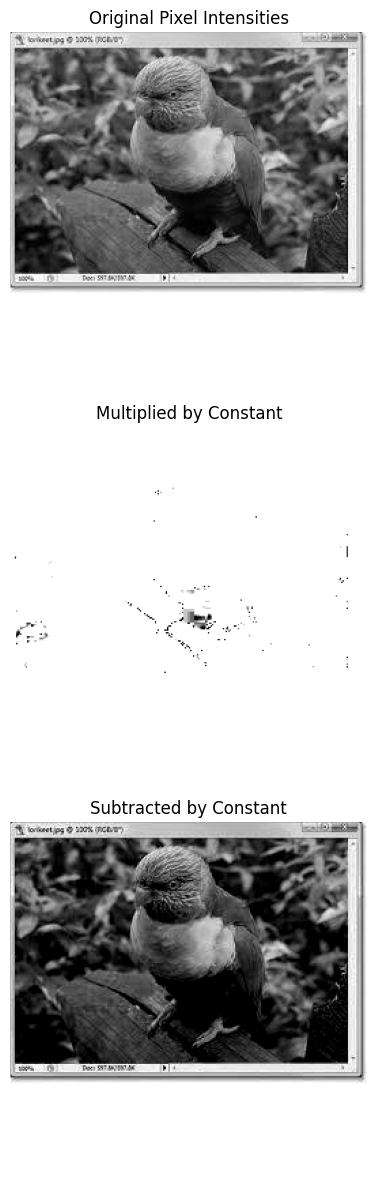

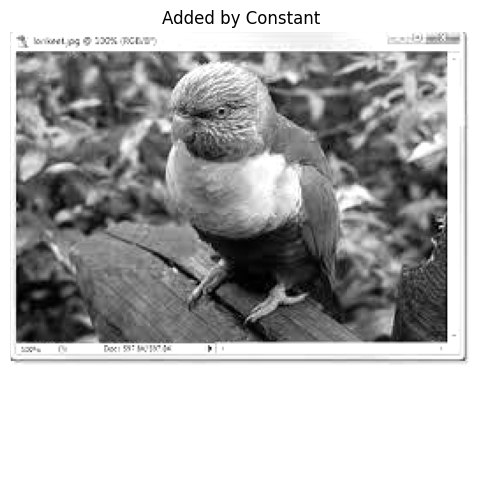

In [41]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt

# Function to read pixel intensities from a file and perform operations
def process_grayscale_pixels(input_text_file, constant):
    # Read pixel values from the text file
    with open(input_text_file, 'r') as f:
        pixel_matrix = [list(map(int, line.strip().split(', '))) for line in f]

    # Convert the list to a NumPy array for easier manipulation
    pixel_array = np.array(pixel_matrix)

    # Perform operations
    multiplied = np.clip(pixel_array * constant, 0, 255)  # Multiply
    subtracted = np.clip(pixel_array - constant, 0, 255)  # Subtract
    added = np.clip(pixel_array + constant, 0, 255)  # Add

    return pixel_array, multiplied, subtracted, added

# Function to display results in square shape
def display_results(original, multiplied, subtracted, added):
    # Find the maximum dimension for square display
    max_dim = max(original.shape)

    # Create subplots for visualization
    plt.figure(figsize=(12, 12))

    # Original Image
    plt.subplot(3, 1, 1)
    plt.title('Original Pixel Intensities')
    plt.imshow(original, cmap='gray', aspect='equal')
    plt.axis('off')
    plt.xlim(0, max_dim)  # Set limits to make it square
    plt.ylim(max_dim, 0)  # Invert y-axis to keep the image orientation

    # Multiplied Image
    plt.subplot(3, 1, 2)
    plt.title('Multiplied by Constant')
    plt.imshow(multiplied, cmap='gray', aspect='equal')
    plt.axis('off')
    plt.xlim(0, max_dim)  # Set limits to make it square
    plt.ylim(max_dim, 0)  # Invert y-axis to keep the image orientation

    # Subtracted Image
    plt.subplot(3, 1, 3)
    plt.title('Subtracted by Constant')
    plt.imshow(subtracted, cmap='gray', aspect='equal')
    plt.axis('off')
    plt.xlim(0, max_dim)  # Set limits to make it square
    plt.ylim(max_dim, 0)  # Invert y-axis to keep the image orientation

    plt.tight_layout()
    plt.show()

    # Display Added Values in square shape
    plt.figure(figsize=(6, 6))
    plt.title('Added by Constant')
    plt.imshow(added, cmap='gray', aspect='equal')
    plt.axis('off')
    plt.xlim(0, max_dim)  # Set limits to make it square
    plt.ylim(max_dim, 0)  # Invert y-axis to keep the image orientation
    plt.show()

# Specify the input file and constant
input_text_file = 'grayscale_pixels.txt'  # The file containing the grayscale pixel intensities
constant = 50  # Change this to your desired constant value

# Process the pixel values
original, multiplied, subtracted, added = process_grayscale_pixels(input_text_file, constant)

# Display the results
display_results(original, multiplied, subtracted, added)


# This is the poutput after subtracting the pixels from 255


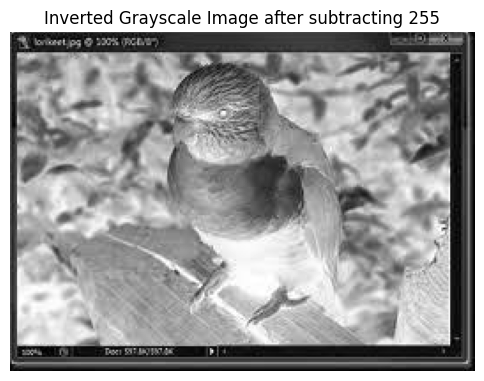

In [43]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt

# Function to read pixel intensities from a file and invert the image
def invert_grayscale_pixels(input_text_file):
    # Read pixel values from the text file
    with open(input_text_file, 'r') as f:
        pixel_matrix = [list(map(int, line.strip().split(', '))) for line in f]

    # Convert the list to a NumPy array for easier manipulation
    pixel_array = np.array(pixel_matrix)

    # Invert the pixel values (255 - original)
    inverted = 255 - pixel_array

    return inverted

# Function to display the inverted image
def display_image(image_array):
    plt.figure(figsize=(6, 6))
    plt.title('Inverted Grayscale Image after subtracting 255')
    plt.imshow(image_array, cmap='gray', aspect='equal')
    plt.axis('off')  # Hide axes
    plt.show()

# Specify the input file
input_text_file = 'grayscale_pixels.txt'  # The file containing the grayscale pixel intensities

# Invert the pixel values
inverted_image = invert_grayscale_pixels(input_text_file)

# Display the inverted image
display_image(inverted_image)


# This is the R,G,B channel output of the original image

/tmp/ipykernel_28235/4236685777.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  pixel_array = np.array(img)


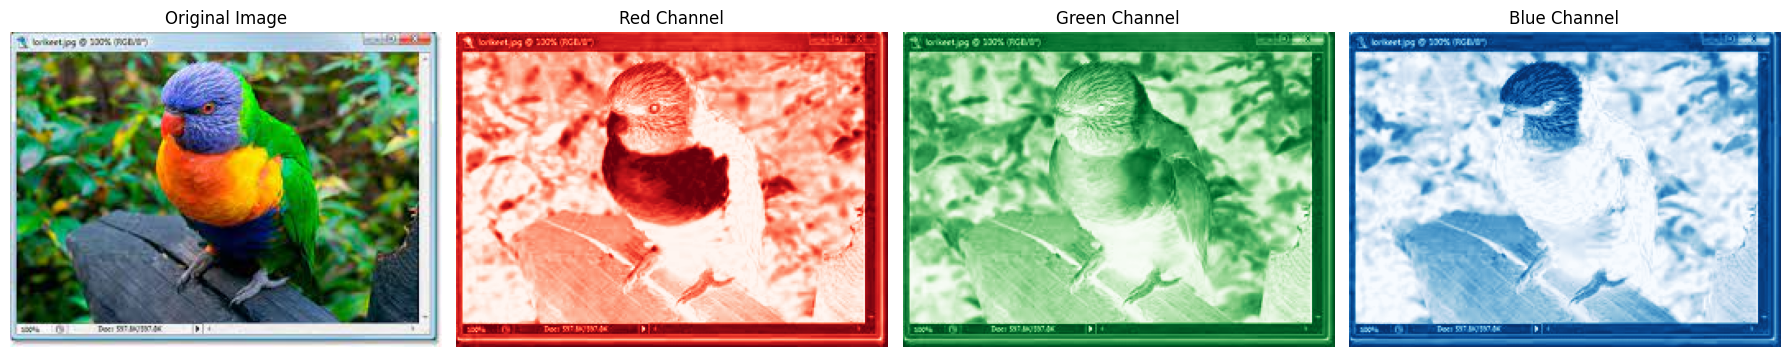

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to read an RGB image and separate channels
def read_image_and_separate_channels(input_file):
    # Read the image
    img = Image.open(input_file)
    
    # Convert image to RGB (in case it's not)
    img = img.convert('RGB')
    
    # Convert to NumPy array
    pixel_array = np.array(img)
    
    # Separate the RGB channels
    R_channel = pixel_array[:, :, 0]
    G_channel = pixel_array[:, :, 1]
    B_channel = pixel_array[:, :, 2]

    return img, R_channel, G_channel, B_channel

# Function to display the original image and its channels
def display_image_and_channels(original, R, G, B):
    plt.figure(figsize=(18, 6))

    # Original Image
    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    # Red Channel Image
    plt.subplot(1, 4, 2)
    plt.title('Red Channel')
    plt.imshow(R, cmap='Reds')
    plt.axis('off')

    # Green Channel Image
    plt.subplot(1, 4, 3)
    plt.title('Green Channel')
    plt.imshow(G, cmap='Greens')
    plt.axis('off')

    # Blue Channel Image
    plt.subplot(1, 4, 4)
    plt.title('Blue Channel')
    plt.imshow(B, cmap='Blues')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Specify the input file
input_file = 'bird.jpeg'  # Change this to your input image path

# Read the image and separate channels
original_image, R, G, B = read_image_and_separate_channels(input_file)

# Display the original image and its channels
display_image_and_channels(original_image, R, G, B)


# Convulated Image, the operator is 3d matrix

In [55]:
import numpy as np

# Read the grayscale pixel values from the file
output_file = 'grayscale_pixels.txt'  # Change this to your grayscale pixel file path

grayscale_array = []
with open(output_file, 'r') as file:
    for line in file:
        row = list(map(int, line.strip().split(', ')))  # Adjust for comma-separated values
        grayscale_array.append(row)

# Convert the list to a NumPy array
grayscale_array_np = np.array(grayscale_array)

# Define the diagonal matrix for convolution
diagonal_matrix = np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]])

rows, cols = grayscale_array_np.shape

# Prepare an array to store the results of the convolution
result_array = np.zeros((rows - 2, cols - 2))

# Perform convolution
for i in range(rows - 2):
    for j in range(cols - 2):
        # Extract the 3x3 region from the original array
        region = grayscale_array_np[i:i+3, j:j+3]
        
        # Perform element-wise multiplication and sum the values
        convolved_value = np.sum(region * diagonal_matrix)
        
        # Store the result in the corresponding position in the result array
        result_array[i, j] = convolved_value

# Print the original and the result arrays
print("Original Array:")
print(grayscale_array_np)
print("\nResult Array (after convolution with diagonal matrix):")
print(result_array)


Original Array:
[[203  56 149 ... 250 255 234]
 [173 185 230 ... 227 247 248]
 [181 255 218 ... 216 240 255]
 ...
 [247 240 198 ... 204 236 255]
 [253 237 220 ... 251 242 248]
 [249 234 250 ... 247 234 255]]

Result Array (after convolution with diagonal matrix):
[[1650. 1726. 1839. ... 1602. 1979. 2172.]
 [1866. 2031. 2035. ... 1589. 1801. 2095.]
 [1900. 2035. 1907. ... 1526. 1657. 2005.]
 ...
 [1771. 1532. 1461. ... 1551. 1817. 2051.]
 [2087. 1944. 1816. ... 1794. 1917. 2095.]
 [2128. 2057. 2012. ... 1979. 2058. 2172.]]


(np.float64(-0.5), np.float64(262.5), np.float64(191.5), np.float64(-0.5))

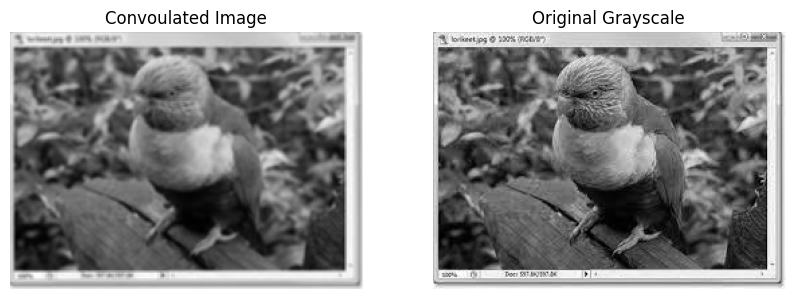

In [56]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(result_array, cmap='gray')
plt.title('Convoulated Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_array, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')